### <a><b><font color = 'blue'>ABDELILAH DAHAMOU
### <a><b><font color = 'blue'>TAZZI KARIM
# <b><a><i><font color = 'red'><center> Mini-projet : la prédiction du prix du Bitcoin

   

<b><font color = 'purple'>Projet sur la prédiction du prix du Bitcoin dans l'apprentissage automatique à l'aide du modèle de régression linéaire. Ce modèle prédit le prix du Bitcoin sur la base du marché.

# Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Import bitcoin_dataset

<b><font color = 'purple'>bitcoin_dataset : est une base de donnée de bitcoin entre 2009 et 2017

In [2]:
df = pd.read_csv('C:/Users/INFOMOLH/Downloads/bitcoin_dataset.csv')
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2009-11-10 00:00:00,0.0,1339450.0,0.0,0.0,0.0,0.000215,0.0,1.0,0.0,...,0.000000,0.0,71.0,71.0,26958.0,71.0,71.0,3550.0,0.0,0.0
1,2009-11-11 00:00:00,0.0,1342900.0,0.0,0.0,0.0,0.000323,0.0,1.0,0.0,...,19.166667,0.0,71.0,78.0,27036.0,78.0,78.0,93450.0,18000.0,0.0
2,2009-11-12 00:00:00,0.0,1346400.0,0.0,0.0,0.0,0.000215,0.0,1.0,0.0,...,0.000000,0.0,70.0,70.0,27106.0,70.0,70.0,3500.0,0.0,0.0
3,2009-11-13 00:00:00,0.0,1349900.0,0.0,0.0,0.0,0.000242,0.0,1.0,0.0,...,673.076923,0.0,73.0,73.0,27179.0,73.0,73.0,4100.0,520.0,0.0
4,2009-11-14 00:00:00,0.0,1354050.0,0.0,0.0,0.0,0.000216,0.0,1.0,0.0,...,0.000000,0.0,83.0,83.0,27262.0,83.0,83.0,4150.0,0.0,0.0


In [3]:
df.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2920.000000,2.920000e+03,2.920000e+03,2.899000e+03,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2.920000e+03,...,2.920000e+03,2920.000000,2920.000000,2920.000000,2.920000e+03,2920.000000,2920.000000,2.920000e+03,2.920000e+03,2.920000e+03
mean,471.825573,1.097689e+07,7.290293e+09,3.161043e+07,30700.727675,0.318071,0.362329,609.304687,7.129773,8.288403e+05,...,1.918640e+03,11.680069,171250.988014,92271.950000,5.985843e+07,85010.164384,56863.946233,1.486692e+06,1.955447e+05,1.123620e+08
std,934.964738,4.456721e+06,1.548875e+10,8.273604e+07,39266.422814,0.336005,0.840614,653.385566,5.045944,1.799654e+06,...,5.128409e+04,13.417497,186576.390606,97395.351614,7.459717e+07,97781.913869,65518.703160,2.280472e+06,2.697794e+05,2.402841e+08
min,0.000000,1.339450e+06,0.000000e+00,0.000000e+00,0.000000,0.000215,0.000000,1.000000,0.000000,2.435803e-06,...,0.000000e+00,0.000000,49.000000,49.000000,2.695800e+04,49.000000,49.000000,2.450000e+03,0.000000e+00,0.000000e+00
25%,5.176775,7.634838e+06,4.556363e+07,2.226471e+05,526.500000,0.020444,0.000000,46.000000,0.000000,1.026067e+01,...,1.215612e+00,3.407589,12042.250000,6713.000000,1.834960e+06,5641.500000,6033.750000,4.313462e+05,8.328650e+04,6.869000e+05
50%,213.115000,1.196590e+07,2.909919e+09,7.884278e+06,11733.000000,0.175100,0.000000,348.000000,7.766667,4.127249e+03,...,2.620644e+00,7.459337,95554.000000,58182.500000,2.672556e+07,42652.500000,30920.500000,1.025858e+06,1.709510e+05,3.070331e+07
75%,546.285000,1.481672e+07,7.178634e+09,2.444343e+07,48666.250000,0.597150,0.000000,1042.519231,9.852083,4.903844e+05,...,6.393794e+00,12.451011,302226.500000,159053.000000,9.165183e+07,154779.000000,94479.250000,1.938697e+06,2.544030e+05,1.097191e+08
max,7437.543317,1.666928e+07,1.239385e+11,1.267435e+09,140294.602454,1.046606,7.000000,2436.070588,47.733333,1.299979e+07,...,2.000000e+06,90.202095,733878.000000,369098.000000,2.694610e+08,361974.000000,286896.000000,4.599222e+07,5.825066e+06,2.396482e+09


In [4]:
df.isnull().sum()

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                      0
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                         0
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                            0
btc_hash_rate                                           0
btc_difficulty                                          0
btc_miners_revenue                                      0
btc_transaction_fees                                    0
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2920 non-null   object 
 1   btc_market_price                                     2920 non-null   float64
 2   btc_total_bitcoins                                   2920 non-null   float64
 3   btc_market_cap                                       2920 non-null   float64
 4   btc_trade_volume                                     2899 non-null   float64
 5   btc_blocks_size                                      2920 non-null   float64
 6   btc_avg_block_size                                   2920 non-null   float64
 7   btc_n_orphaned_blocks                                2920 non-null   float64
 8   btc_n_transactions_per_block                         2920 non-null  

# Dealing with correlation

In [6]:
df.corr()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.505525,0.998754,0.865666,0.778021,0.638733,-0.018435,0.634141,0.382253,0.936906,...,-0.018871,0.508885,0.693405,0.638983,0.783734,0.636030,0.676992,0.144627,0.079349,0.932600
btc_total_bitcoins,0.505525,1.000000,0.489149,0.392351,0.768629,0.837847,0.308633,0.820593,0.696329,0.527690,...,-0.078306,0.377003,0.827909,0.826449,0.774751,0.802607,0.788120,0.309123,0.248380,0.493419
btc_market_cap,0.998754,0.489149,1.000000,0.866589,0.779411,0.636537,-0.029707,0.633002,0.376324,0.945049,...,-0.017602,0.469657,0.689647,0.636787,0.784467,0.634003,0.676252,0.147048,0.080443,0.935001
btc_trade_volume,0.865666,0.392351,0.866589,1.000000,0.630091,0.515100,-0.023086,0.511495,0.302270,0.807032,...,-0.014341,0.407815,0.575946,0.526832,0.634525,0.521655,0.554692,0.150225,0.102297,0.871707
btc_blocks_size,0.778021,0.768629,0.779411,0.630091,1.000000,0.956080,0.108767,0.950862,0.515373,0.878161,...,-0.029240,0.231905,0.968330,0.953484,0.999742,0.956806,0.967324,0.262282,0.175618,0.784662
btc_avg_block_size,0.638733,0.837847,0.636537,0.515100,0.956080,1.000000,0.196051,0.979900,0.564447,0.737542,...,-0.035374,0.170507,0.979507,0.982198,0.954729,0.979142,0.971025,0.306362,0.212774,0.665710
btc_n_orphaned_blocks,-0.018435,0.308633,-0.029707,-0.023086,0.108767,0.196051,1.000000,0.161314,0.101980,-0.049741,...,-0.016111,0.109584,0.188796,0.158485,0.109986,0.164069,0.119567,0.008783,0.031096,-0.033215
btc_n_transactions_per_block,0.634141,0.820593,0.633002,0.511495,0.950862,0.979900,0.161314,1.000000,0.568462,0.734131,...,-0.034814,0.156386,0.973841,0.981642,0.949488,0.976211,0.975676,0.306682,0.208186,0.662572
btc_median_confirmation_time,0.382253,0.696329,0.376324,0.302270,0.515373,0.564447,0.101980,0.568462,1.000000,0.400548,...,-0.052813,0.159293,0.534143,0.560165,0.522496,0.520063,0.543245,0.322131,0.240831,0.381425
btc_hash_rate,0.936906,0.527690,0.945049,0.807032,0.878161,0.737542,-0.049741,0.734131,0.400548,1.000000,...,-0.017227,0.299102,0.784631,0.751021,0.880362,0.750741,0.790310,0.194838,0.114140,0.919492


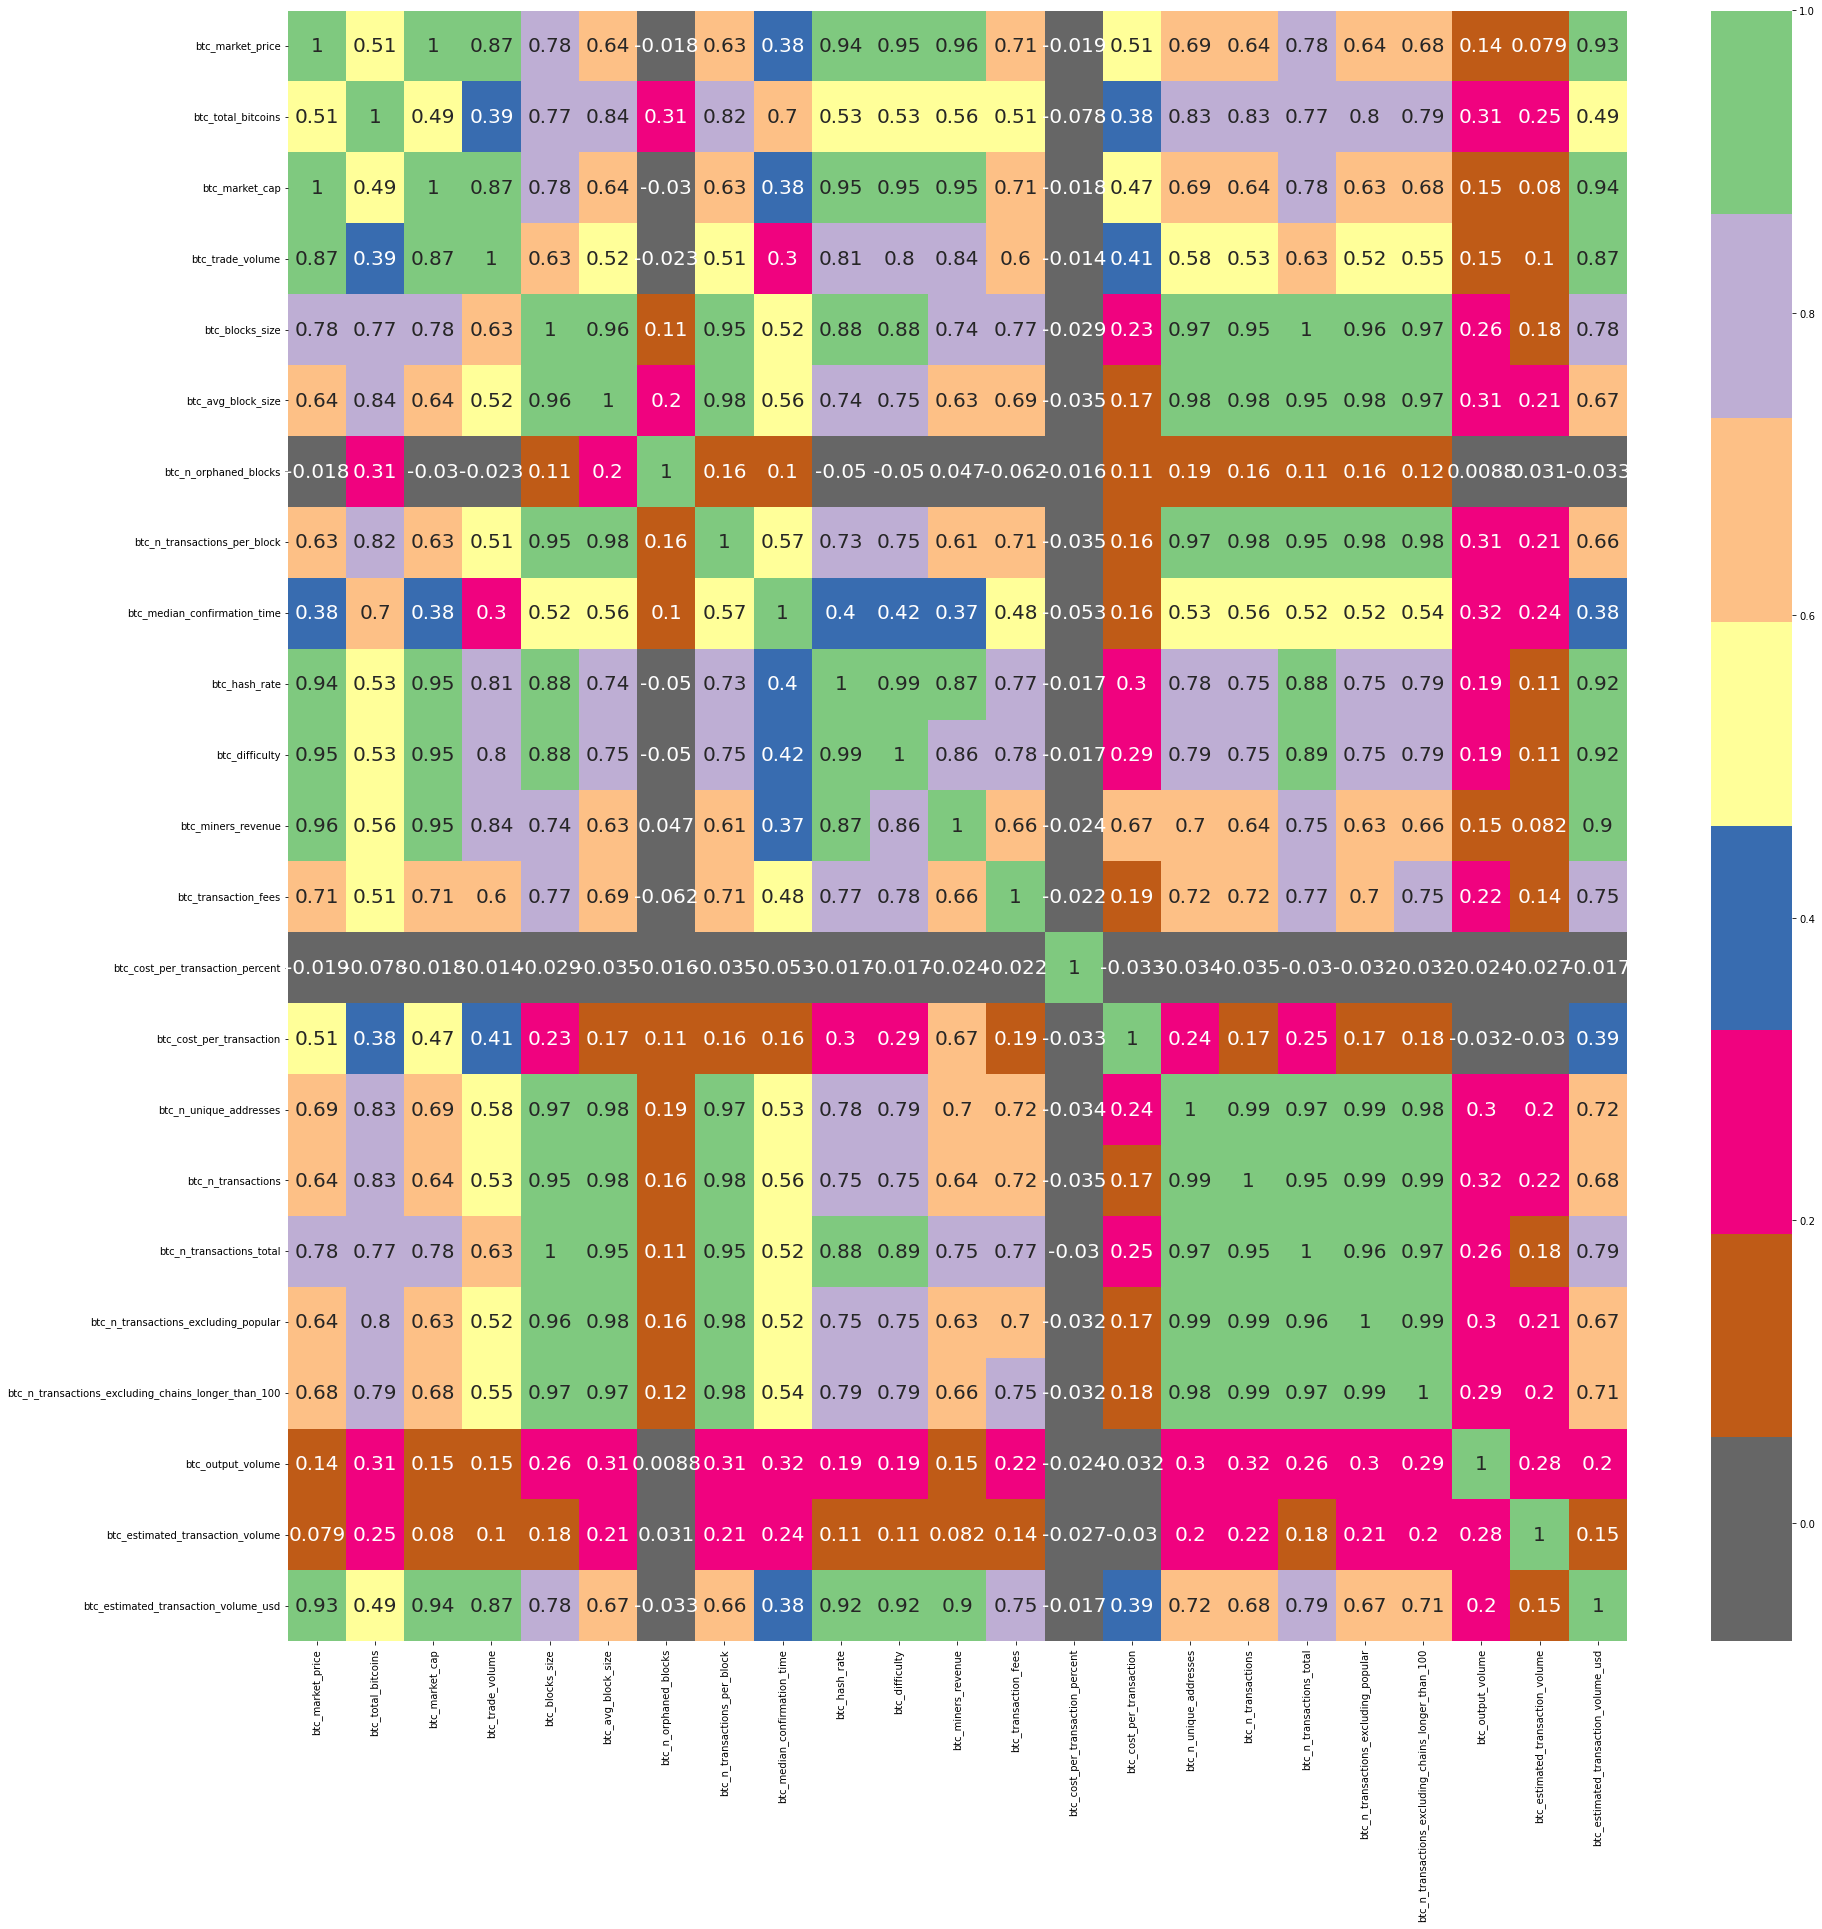

In [8]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr() , annot=True , cmap=plt.cm.Accent_r,annot_kws={'fontsize':20})
plt.show()

In [71]:
def correlation(data , threshold):
    corr = data.corr()['btc_market_price'].sort_values(ascending=False)[1:]
    abs_corr = abs(corr)
    relevant_features = abs_corr[abs_corr>threshold]
    return relevant_features

In [72]:
corr_features = correlation(df,0.81)

In [73]:
corr_features

btc_market_cap                          0.998754
btc_miners_revenue                      0.961680
btc_difficulty                          0.946400
btc_hash_rate                           0.936906
btc_estimated_transaction_volume_usd    0.932600
btc_trade_volume                        0.865666
Name: btc_market_price, dtype: float64

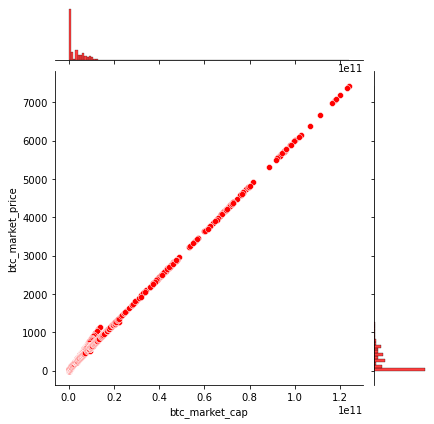

In [74]:
sns.jointplot(df['btc_market_cap'] , df['btc_market_price'],color='red')

<font color = 'purple'><b>btc_market_price</b> is highly correlated with <b>btc_market_cap</b>

In [76]:
df1 = df[corr_features.index]

In [77]:
df1

,btc_market_cap,btc_miners_revenue,btc_difficulty,btc_hash_rate,btc_estimated_transaction_volume_usd,btc_trade_volume
0,0.000000e+00,0.000000e+00,1.000000e+00,3.529429e-06,0.000000e+00,0.000000e+00
1,0.000000e+00,0.000000e+00,1.000000e+00,3.430009e-06,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,1.000000e+00,3.479719e-06,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,1.000000e+00,3.479719e-06,0.000000e+00,0.000000e+00
4,0.000000e+00,0.000000e+00,1.000000e+00,4.125952e-06,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...
2915,1.199304e+11,1.226132e+07,1.452840e+12,8.594306e+06,1.672135e+09,3.748147e+08
2916,1.239385e+11,1.365533e+07,1.452840e+12,9.388737e+06,1.424365e+09,5.635740e+08
2917,1.229428e+11,1.395362e+07,1.452840e+12,1.018317e+07,1.309727e+09,5.685735e+08
2918,1.164891e+11,1.284242e+07,1.452840e+12,9.605401e+06,1.568492e+09,8.328224e+08


In [78]:
df1.shape

(2920, 6)

## Dealing with null values

In [79]:
df1.isnull().sum()

btc_market_cap                           0
btc_miners_revenue                       0
btc_difficulty                           0
btc_hash_rate                            0
btc_estimated_transaction_volume_usd     0
btc_trade_volume                        21
dtype: int64

In [80]:
df1['btc_difficulty'] = df1['btc_difficulty'].fillna(df1['btc_difficulty'].mean())
df1['btc_trade_volume'] = df1['btc_trade_volume'].fillna(df1['btc_trade_volume'].mean())

In [81]:
df1.isnull().sum()

btc_market_cap                          0
btc_miners_revenue                      0
btc_difficulty                          0
btc_hash_rate                           0
btc_estimated_transaction_volume_usd    0
btc_trade_volume                        0
dtype: int64

## Split data into independent and dependent features

<b><font color = 'purple'>Subdivisée la base de donnée en deux parties : X = df1 et Y = df['btc_market_price']

In [82]:
X = df1
y = df['btc_market_price']

## Train Model

In [83]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=51)

In [84]:
X_train.shape ,  X_test.shape , y_train.shape , y_test.shape

((2336, 6), (584, 6), (2336,), (584,))

## Feature Scaling

In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [86]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Train a model

In [87]:
lr = LinearRegression()

In [88]:
lr.fit(X_train , y_train)

LinearRegression()

## Test model

In [89]:
pred = lr.predict(X_test)

In [90]:
pred[0]

181.30174005095978

In [91]:
y_test.iloc[0]

189.06

## ERROR EVALUATION

In [92]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
import math

In [93]:
print(f'Mean Squared Error = {mean_squared_error(y_test,pred)}')
print(f'Root Mean Squared Error = {math.sqrt(mean_squared_error(y_test,pred))}')
print(f'Mean Absolute Error = {mean_absolute_error(y_test,pred)}')

Mean Squared Error = 341.81342383117186
Root Mean Squared Error = 18.488196878851433
Mean Absolute Error = 11.794002515056649


# <b><font color = 'purple'>FIN